In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

In [2]:
# Generate synthetic dataset with outliers
X, y = make_moons(n_samples=50, noise=0.3, random_state=42)
outliers = np.array([[-1.5, 2], [2, 1], [0, 3], [-0.5, -1.5], [1.5, -1], [1, 2.5], [-1, -2], [-2, -1], [2.5, 0], [-2, 1]])
X = np.concatenate([X, outliers], axis=0)
y = np.concatenate([y, [0] * len(outliers)])

In [3]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [5]:
# Train Gaussian mixture model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_train)

GaussianMixture(n_components=2, random_state=42)

In [6]:
# Evaluate performance on testing set
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic regression accuracy: {acc_lr:.2f}")

y_pred_gmm = gmm.predict(X_test)
acc_gmm = accuracy_score(y_test, y_pred_gmm)
print(f"Gaussian mixture model accuracy: {acc_gmm:.2f}")

Logistic regression accuracy: 0.83
Gaussian mixture model accuracy: 0.67




---


**Logistic regression model**

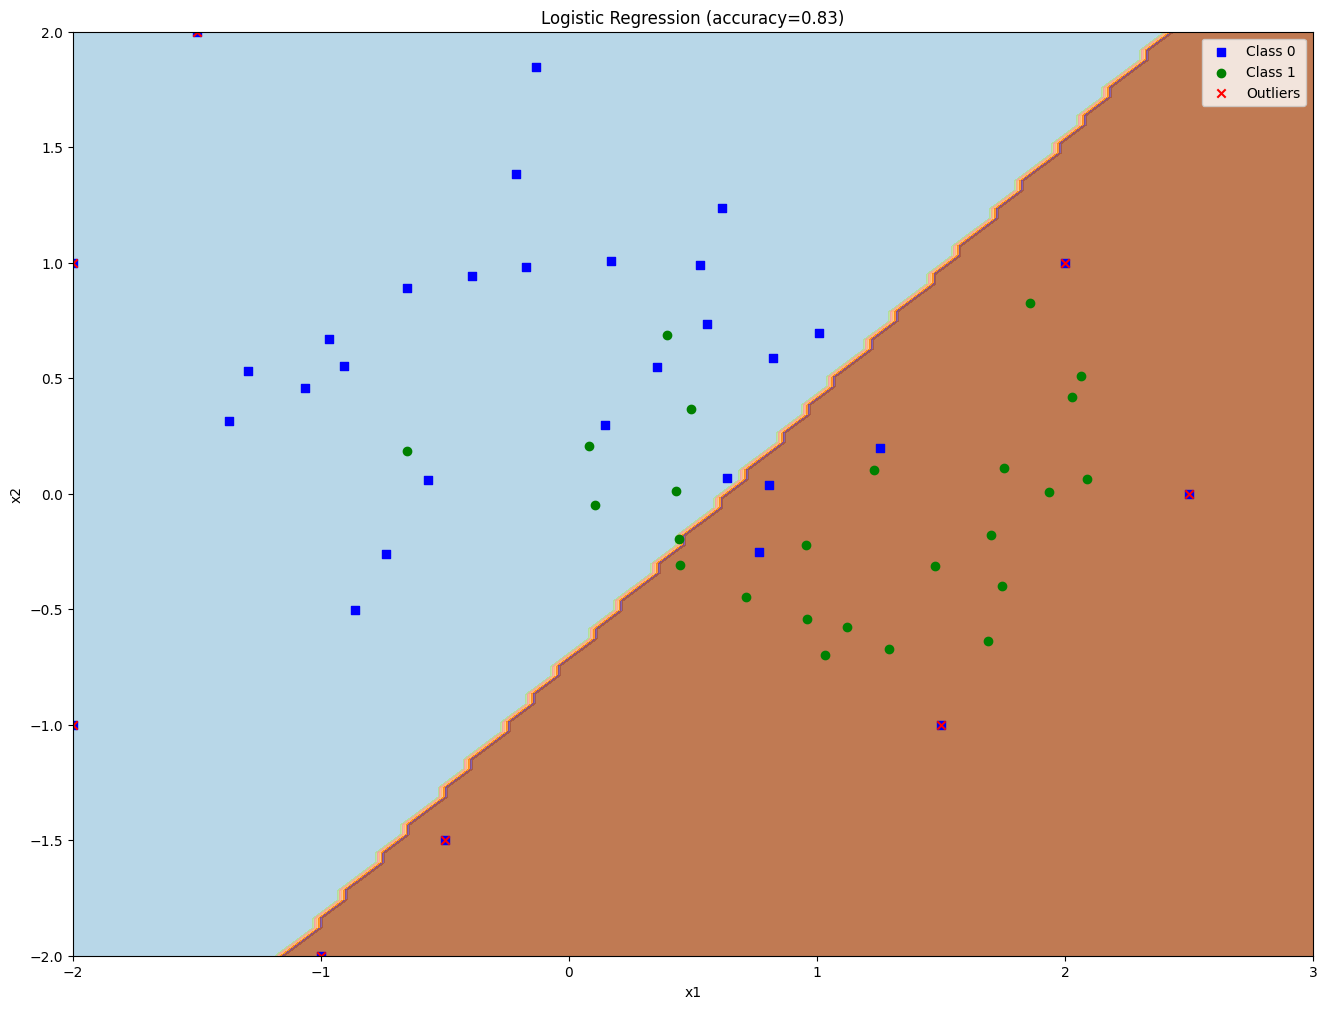

In [7]:
# Plot decision boundary of logistic regression model
fig, ax = plt.subplots(figsize=(16, 12))        # these units are in inches
xx, yy = np.meshgrid(np.linspace(-2, 3, 100), np.linspace(-2, 2, 100))
Z_lr = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lr = Z_lr.reshape(xx.shape)
ax.contourf(xx, yy, Z_lr, cmap=plt.cm.Paired, alpha=0.8)

# Plot data points
ax.scatter(X[y==0][:, 0], X[y==0][:, 1], c='b', marker='s', label='Class 0')
ax.scatter(X[y==1][:, 0], X[y==1][:, 1], c='g', marker='o', label='Class 1')
ax.scatter(outliers[:, 0], outliers[:, 1], c='r', marker='x', label='Outliers')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_xlim(-2, 3)
ax.set_ylim(-2, 2)
ax.set_title(f"Logistic Regression (accuracy={acc_lr:.2f})")
ax.legend()



---



**Gaussian mixture model**

- A generative model that models the joint probability distribution of the input features and the output class labels, where the input features are assumed to be generated from a mixture of Gaussian distributions.

- GMM is similar to Naive Bayes in that both are generative models that model the joint probability distribution of the input features and the output class labels. However, GMM assumes that the input features are generated from a mixture of Gaussian distributions, while Naive Bayes assumes that the input features are generated from independent conditional probabilities.

- GMM can be used for:
    - clustering, 
    - density estimation, and 
    - classification

/tmp/ipykernel_209502/2359709034.py:10: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(outliers[:, 0], outliers[:, 1], c='r', marker='x', label='Outliers', edgecolor='r') # the c parameter is changed to 'k' to make the outliers black, for red use 'r'


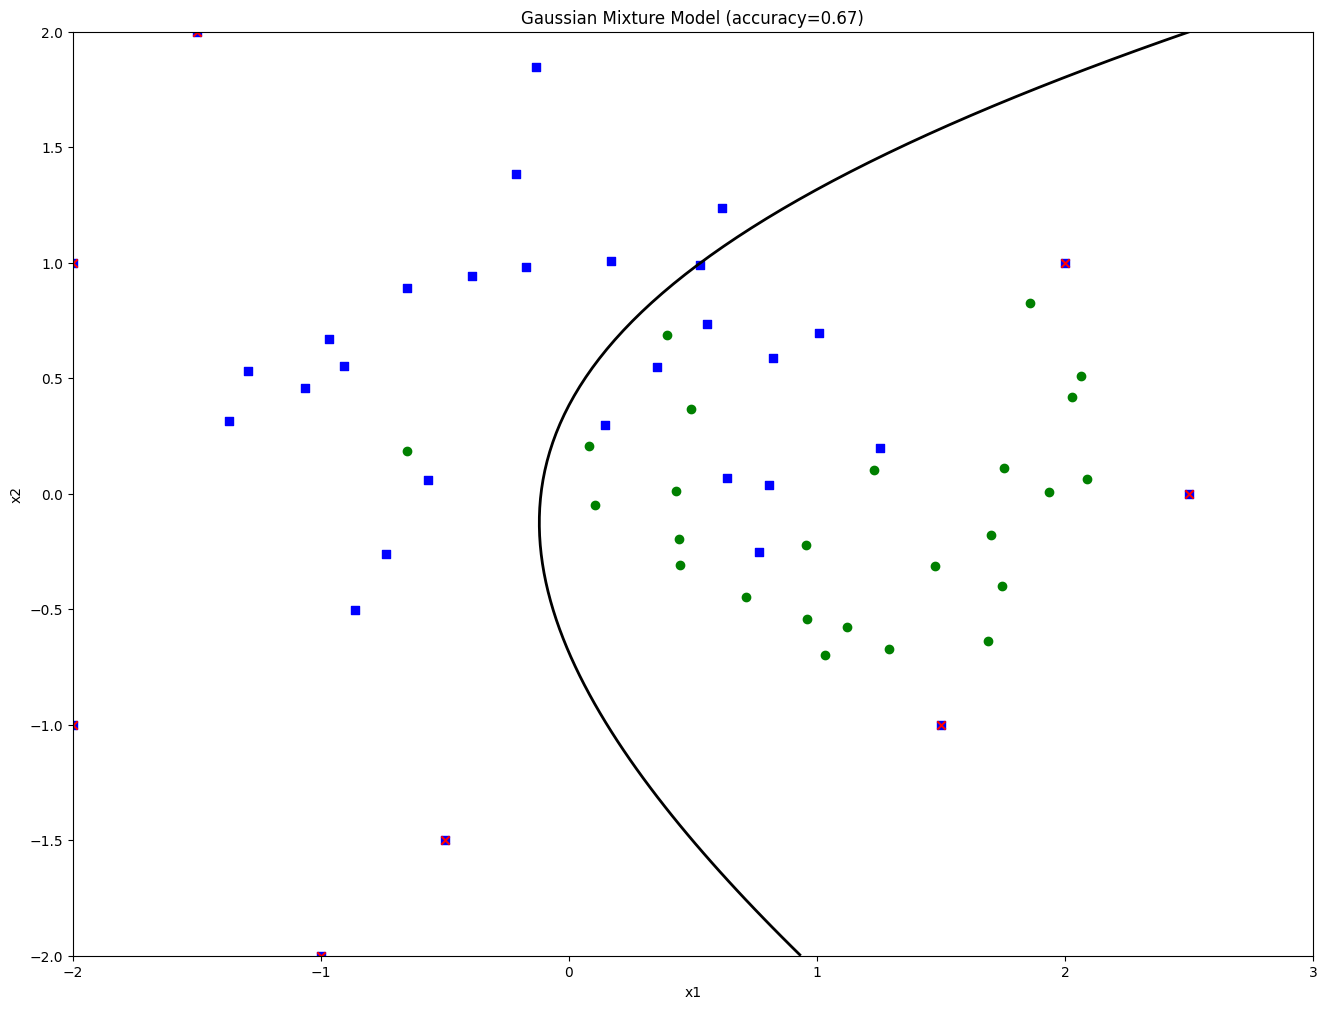

In [8]:
# Plot decision boundary of Gaussian mixture model
fig, ax = plt.subplots(figsize=(16, 12))
Z_gmm = gmm.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_gmm = Z_gmm.reshape(xx.shape)
ax.contour(xx, yy, Z_gmm, levels=[0.5], colors='k', linewidths=2)

# Plot data points
ax.scatter(X[y==0][:, 0], X[y==0][:, 1], c='b', marker='s', label='Class 0')
ax.scatter(X[y==1][:, 0], X[y==1][:, 1], c='g', marker='o', label='Class 1')
ax.scatter(outliers[:, 0], outliers[:, 1], c='r', marker='x', label='Outliers', edgecolor='r') # the c parameter is changed to 'k' to make the outliers black, for red use 'r'
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-2, 3)
plt.ylim(-2, 2)
plt.title(f"Gaussian Mixture Model (accuracy={acc_gmm:.2f})")
plt.show()